In [1]:
#Se importan las librerias, son nesesarias para poder hacer correr el codigo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import rand_score

In [3]:
df = pd.read_csv(r"C:\Users\Ivan\Downloads\archiveAPP\googleplaystore.csv")

In [4]:
#Análisis exploratorio, toda informacion referente a los datos obtenidos que sea valiosa
df.head(5) #Mostramos la informacion

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info() #Vemos informacion relacionada a las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df = df.drop(["Last Updated","Current Ver","Android Ver","Price","Reviews","Size","App","Installs"], axis = 1) #Eliminamos columnas que no son necesarias, no aportan datos utiles

In [7]:
col_to_move = 'Rating' #Moveremos la columna mas relevante para que sea mas comodo mover los datos

# Extraer la columna
col = df.pop(col_to_move)

# Añadir la columna al final
df[col_to_move] = col

In [8]:
df.head()

,Category,Type,Content Rating,Genres,Rating
0,ART_AND_DESIGN,Free,Everyone,Art & Design,4.1
1,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,3.9
2,ART_AND_DESIGN,Free,Everyone,Art & Design,4.7
3,ART_AND_DESIGN,Free,Teen,Art & Design,4.5
4,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,4.3


In [9]:
Completitud = ((df.notnull().sum() / len(df))*100).mean()
print("La completitud de los datos es del", Completitud, "%")

La completitud de los datos es del 97.27700396642378 %


In [10]:
# Crear una lista vacía para contener los resultados
resultados = []

# Iterar sobre las columnas del DataFrame
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        # Agregar los resultados formateados a la lista
        resultados.append([column, missing, f"{portion:.2f}%"])

# Ordenar los resultados en orden ascendente según el número de valores faltantes
resultados_ordenados = sorted(resultados, key=lambda x: x[1])

# Imprimir los resultados
print(tabulate(resultados_ordenados, headers=["Columna", "Valores faltantes", "Porcentaje de valores faltantes"]))

Columna           Valores faltantes  Porcentaje de valores faltantes
--------------  -------------------  ---------------------------------
Type                              1  0.01%
Content Rating                    1  0.01%
Rating                         1474  13.60%


In [11]:
df = df.dropna() #Eliminamos los datos faltantes

In [12]:
Completitud = ((df.notnull().sum() / len(df))*100).mean() #Vemos nuevamente la completitud de los datos
print("La completitud de los datos es del", Completitud, "%")

La completitud de los datos es del 100.0 %


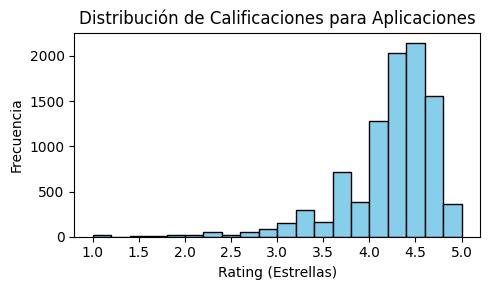

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [13]:
# Estadísticas descriptivas
descriptivas = df['Rating'].describe()

# Histogramas para las características numéricas
plt.figure(figsize=(5,3))
# Histograma de las calificaciones
plt.hist(df['Rating'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribución de Calificaciones para Aplicaciones')
plt.xlabel('Rating (Estrellas)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Descripcion del grafico
descriptivas

In [14]:
df.groupby("Category")["Rating"].mean().round(2) #Muestra el promedio de estrellas de cada categoria de las aplicacion

Category
ART_AND_DESIGN         4.36
AUTO_AND_VEHICLES      4.19
BEAUTY                 4.28
BOOKS_AND_REFERENCE    4.35
BUSINESS               4.12
COMICS                 4.16
COMMUNICATION          4.16
DATING                 3.97
EDUCATION              4.39
ENTERTAINMENT          4.13
EVENTS                 4.44
FAMILY                 4.19
FINANCE                4.13
FOOD_AND_DRINK         4.17
GAME                   4.29
HEALTH_AND_FITNESS     4.28
HOUSE_AND_HOME         4.20
LIBRARIES_AND_DEMO     4.18
LIFESTYLE              4.09
MAPS_AND_NAVIGATION    4.05
MEDICAL                4.19
NEWS_AND_MAGAZINES     4.13
PARENTING              4.30
PERSONALIZATION        4.34
PHOTOGRAPHY            4.19
PRODUCTIVITY           4.21
SHOPPING               4.26
SOCIAL                 4.26
SPORTS                 4.22
TOOLS                  4.05
TRAVEL_AND_LOCAL       4.11
VIDEO_PLAYERS          4.06
WEATHER                4.24
Name: Rating, dtype: float64

In [15]:
mean_ratings = df.groupby('Category')['Rating'].mean()
category = mean_ratings.idxmin()
min_value = mean_ratings.min()
valor_formateado = f'{min_value:.1f}'
print("La Categoria con menos puntuacion es la de", category , "/ CITAS con un promedio de", valor_formateado, "Estrellas")

La Categoria con menos puntuacion es la de DATING / CITAS con un promedio de 4.0 Estrellas


In [16]:
mean_ratings = df.groupby('Category')['Rating'].mean()
category = mean_ratings.idxmax()
max_value = mean_ratings.max()
valor_formateado = f'{max_value:.1f}'
print("La Categoria con mayor puntuacion es la de", category , "/ EVENTOS con un promedio de", valor_formateado, "Estrellas")

La Categoria con mayor puntuacion es la de EVENTS / EVENTOS con un promedio de 4.4 Estrellas


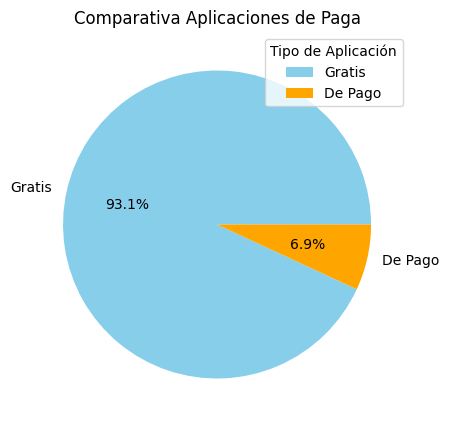

In [17]:
values = df["Type"].value_counts() #Generamos un grafico compativo de la columna que muestra el tipo de aplicacion, si es de paga o gratis
labels = ["Gratis", "De Pago"]
colors = ["#87CEEB", "#FFA500"] #Colores

plt.figure(figsize=(10, 5)) # Tamaño del gráfico
plt.pie(values, labels=labels,colors=colors, autopct='%1.1f%%') # Mostrar porcentajes en el gráfico
plt.title("Comparativa Aplicaciones de Paga")
plt.legend(title="Tipo de Aplicación")
plt.show()

In [18]:
df["Content Rating"].unique() #Vemos las clasificaciones posibles para las aplicaciones

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [64]:
#Transformacion de los datos, esto se hace con el fin de que el ordenador pueda entender nuestros datos, asi como nosotros leemos las palabras

In [19]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder.fit_transform(list(df[col].values))
        df[col] = label_encoder.transform(df[col].values)

In [20]:
data = pd.get_dummies(data=df, columns=["Type"])

In [21]:
array = df.values # Separamos nuestros datos, existe una columna que depende del resto de datos por eso la separamos, en este caso es la columna "Rating" que nos muestra las estrellas de la aplicacion
X = df.iloc[:, :-1]  # Todas las columnas menos la última
y = df.iloc[:, -1]   # Solo la última columna

In [22]:
y.shape, X.shape #Observamos las dimensiones de los datos

((9366,), (9366, 4))

In [23]:
#Se Divide los datos en entrenamiento y validación, todo esto se hace para que podamos hacer predicciones a futuro
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

# Verificamos las dimensiones después de la división
print(X_train.shape[0], y_train.shape[0])
print(X_test.shape[0], y_test.shape[0])

2341 2341
7025 7025


In [24]:
# Creamos y ajustarmos el modelo del proyecto, existen distintos tipos de modelos, para este proyecto se ajusta bien uno llamado "regresión lineal" que a continuacion configuraremos para utilizarlo
# Esto se llama "Entrenar el modelo"
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.26


In [25]:
#Metricas para medir errores dentro del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 0.2639210699374361
Raíz del Error Cuadrático Medio (RMSE): 0.5137324886917666
Error Absoluto Medio (MAE): 0.36024451611309727
Coeficiente de Determinación (R²): 0.003223877493056304


In [26]:
scaler = StandardScaler() #Se escalan los valores para poder hacer predicciones
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_data = np.array([[5, 0, 2, 1]])  # Prediccion generada
new_data_scaled = scaler.transform(new_data)  #Se escalan los datos
predicted_class = model.predict(new_data_scaled)

print(f'La calificacion en estrellas que tendra la aplicacion sera de : {predicted_class[0]:.1f}')

La calificacion en estrellas que tendra la aplicacion sera de : 4.2


c:\Users\Ivan\Desktop\Proyecto - copia\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Desktop\Proyecto - copia\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
#Se genera una consulta hipotetita para predecir el rating de la aplicacion
pregunta = pd.DataFrame({
    'Category': [5], #COMMUNICATION
    'Type': [2], #Free
    'Content Rating': [1], #Everyone 10+
    'Genres': [1]

})
new_data_scaled = scaler.transform(pregunta)  # Asegúrate de escalar los nuevos datos
predicted_class = model.predict(new_data_scaled)

pregunta_escalada = scaler.transform(pregunta)

prediccion = model.predict(pregunta_escalada)
print("La Aplicacion tendra", round(prediccion[0],1), "Estrellas estimadas")

La Aplicacion tendra 4.5 Estrellas estimadas


c:\Users\Ivan\Desktop\Proyecto - copia\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ivan\Desktop\Proyecto - copia\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
prediccion_y = model.predict(X) #Generamos una lista de predicciones para compararlas con la realidad
pd.DataFrame({'Realidad': y,
              'Prediccion': prediccion_y}).head()

,Realidad,Prediccion
0,4.1,4.238030
1,3.9,4.237137
2,4.7,4.238030
3,4.5,4.260294
4,4.3,4.237583


In [29]:
score = rand_score(y, prediccion_y) #Medimos la eficiencia o precision del modelo
score_percentage = score * 100
print(f"La eficiencia del modelo es del {score_percentage:.2f}%")

La eficiencia del modelo es del 90.73%


c:\Users\Ivan\Desktop\Proyecto - copia\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
